In [1]:
import pandas as pd
import matplotlib.pyplot as plt

red_wines = pd.read_csv('./winequality-red.csv', sep=';')
white_wines = pd.read_csv('./winequality-white.csv', sep=';')

red_wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


# V.1: Exploring the green reds

__a) Write a function that will plot a scatterplot matrix of your red wine data__

In [2]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    fig, axes = plt.subplots(12, 12, figsize=(100,100))
    fig.subplots_adjust(hspace=0, wspace=0)
    
    
    
    for ax in axes.flat:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    
    for y in range(0, 12):
        for x in range(0, 12):
            if x == y:
                axes[y, x].text(0.5, 0.5, wine_data.columns[y], fontsize=40, ha='center', va='center')
            else:
                colors = ['b' if k >= good_threshold else 'r' for k in wine_data['quality']]
                size = [30 if k > good_threshold else 30 if k < bad_threshold else 0 for k in wine_data['quality']]
                axes[y, x].scatter(wine_data.iloc[:, x], wine_data.iloc[:, y], s=size, c=colors)
            
    if save_plot == True:
        plt.savefig('scatter_matrix.png')

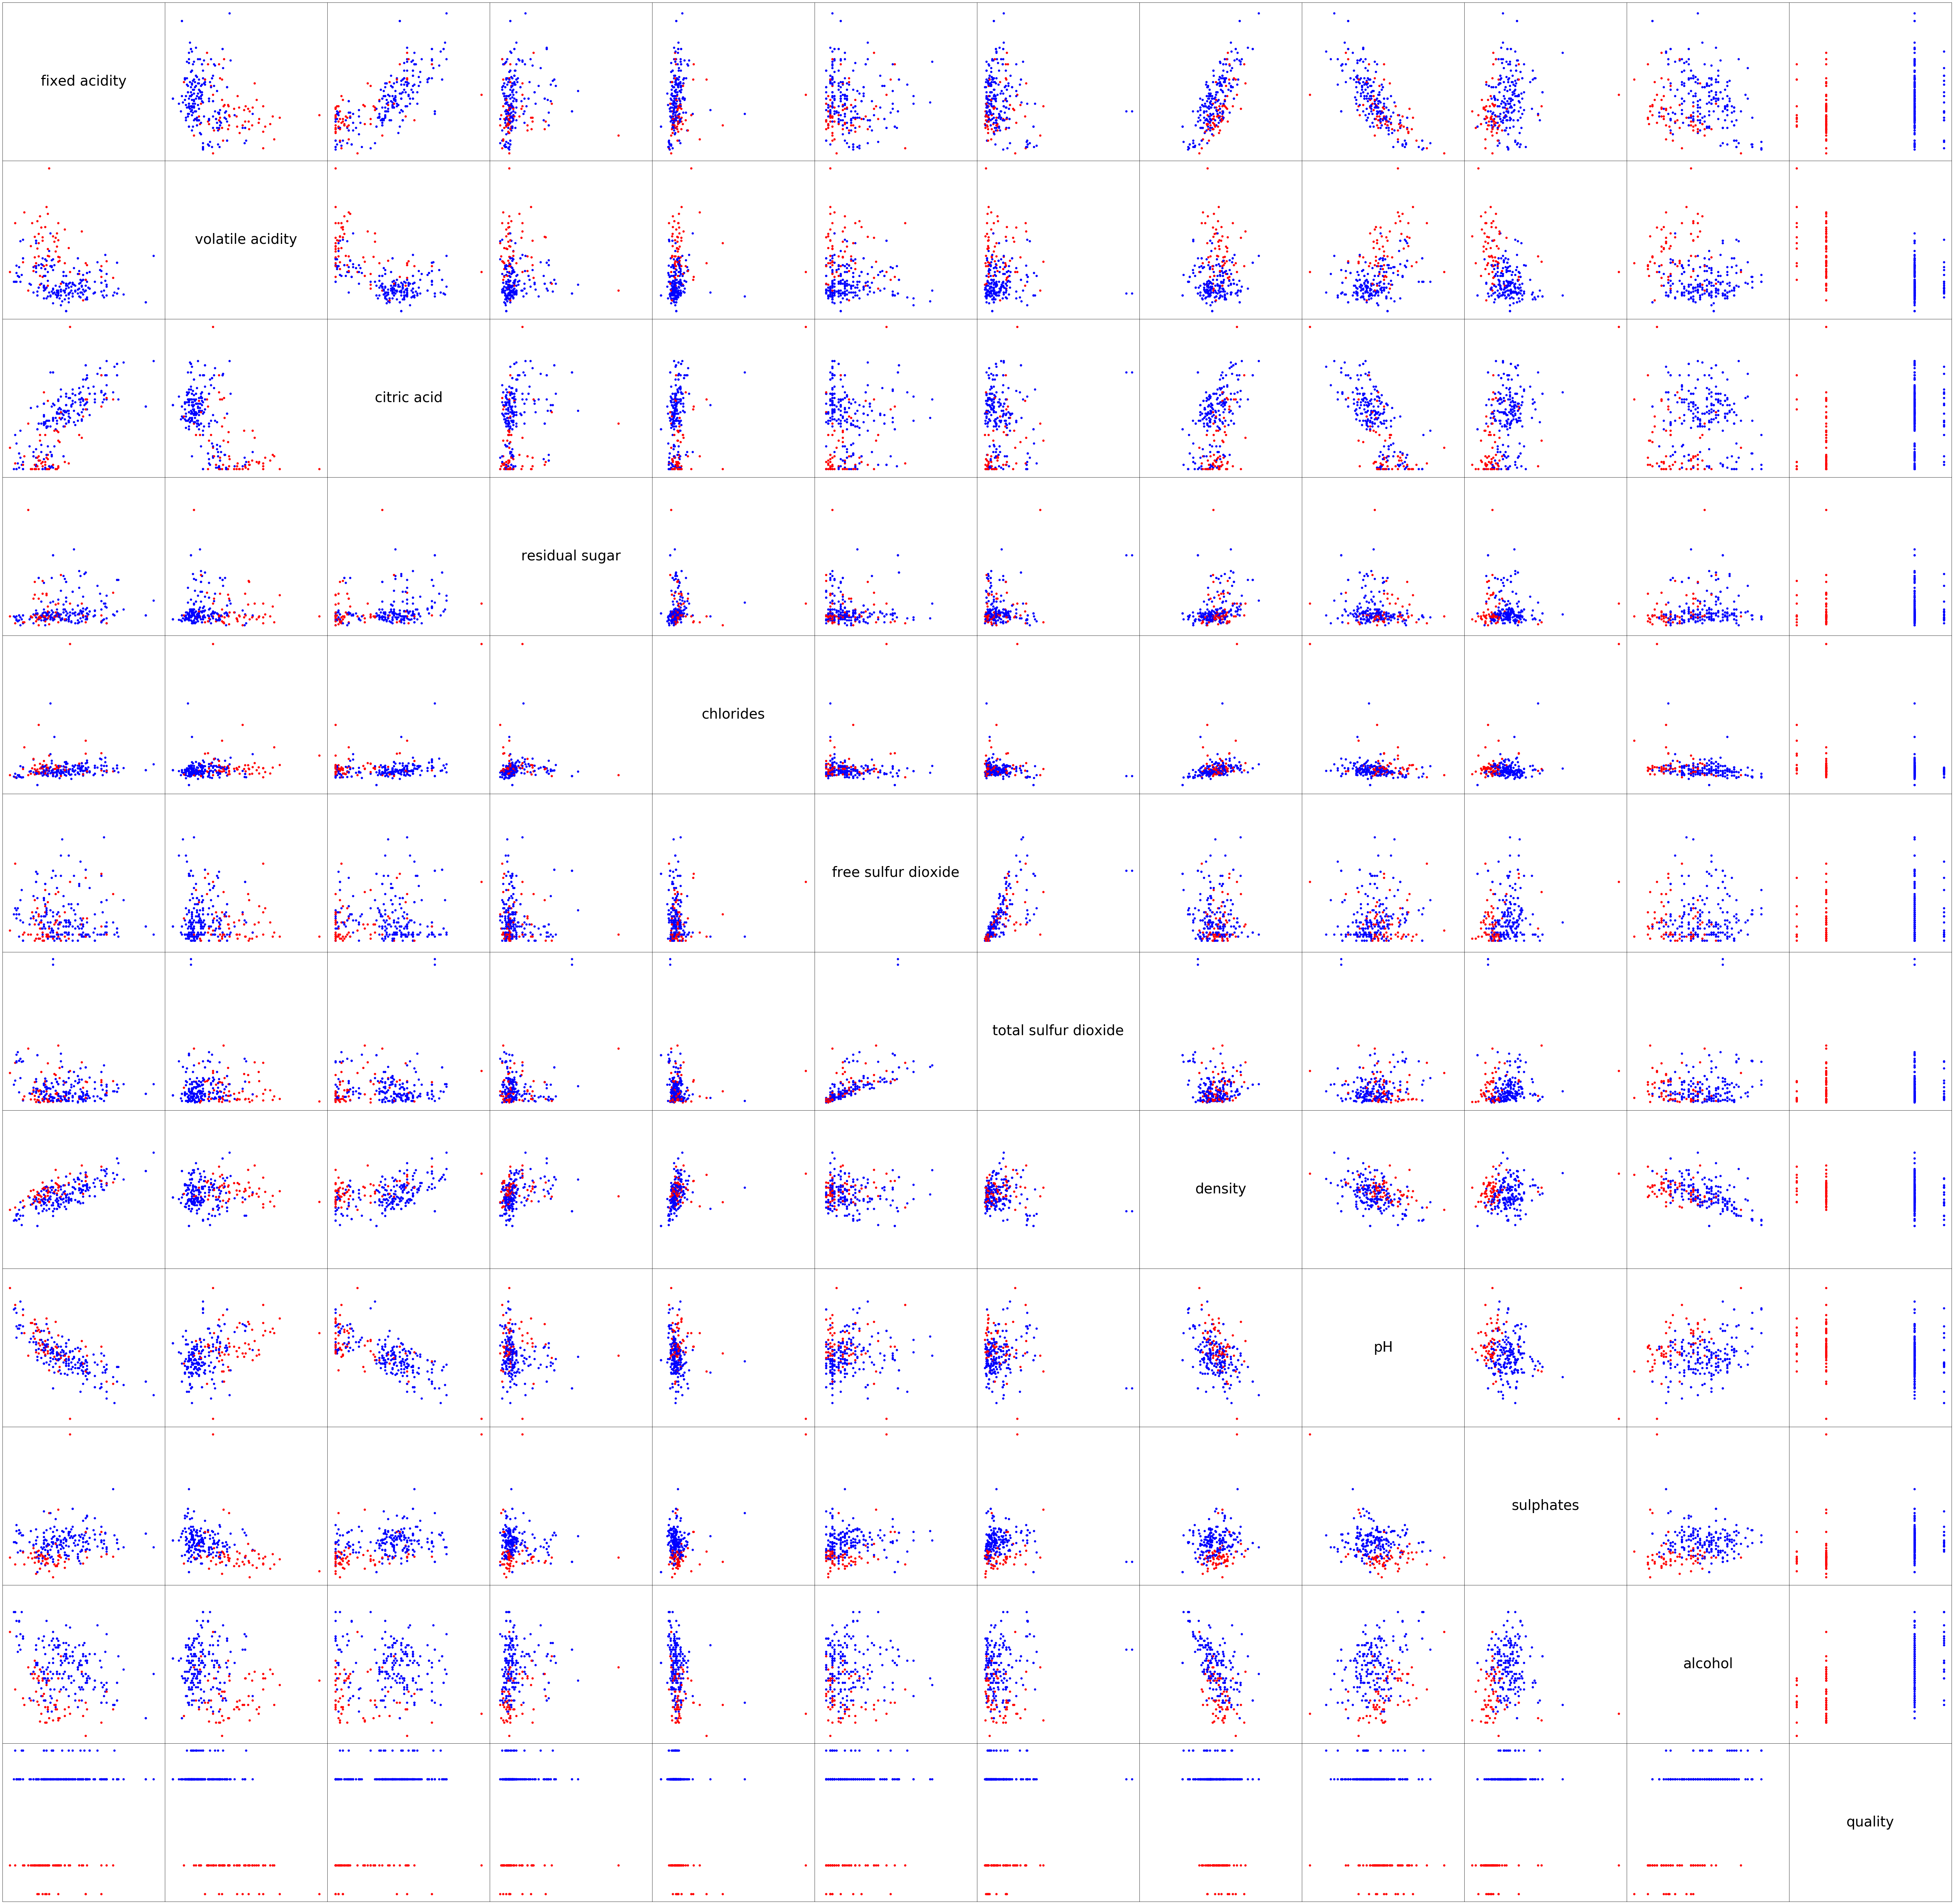

In [3]:
plot_scatter_matrix(red_wines, 6, 5)

__b) Which factors do you think will be most useful to your perceptron for distinguishing high quality vs. low quality wines? Why?__

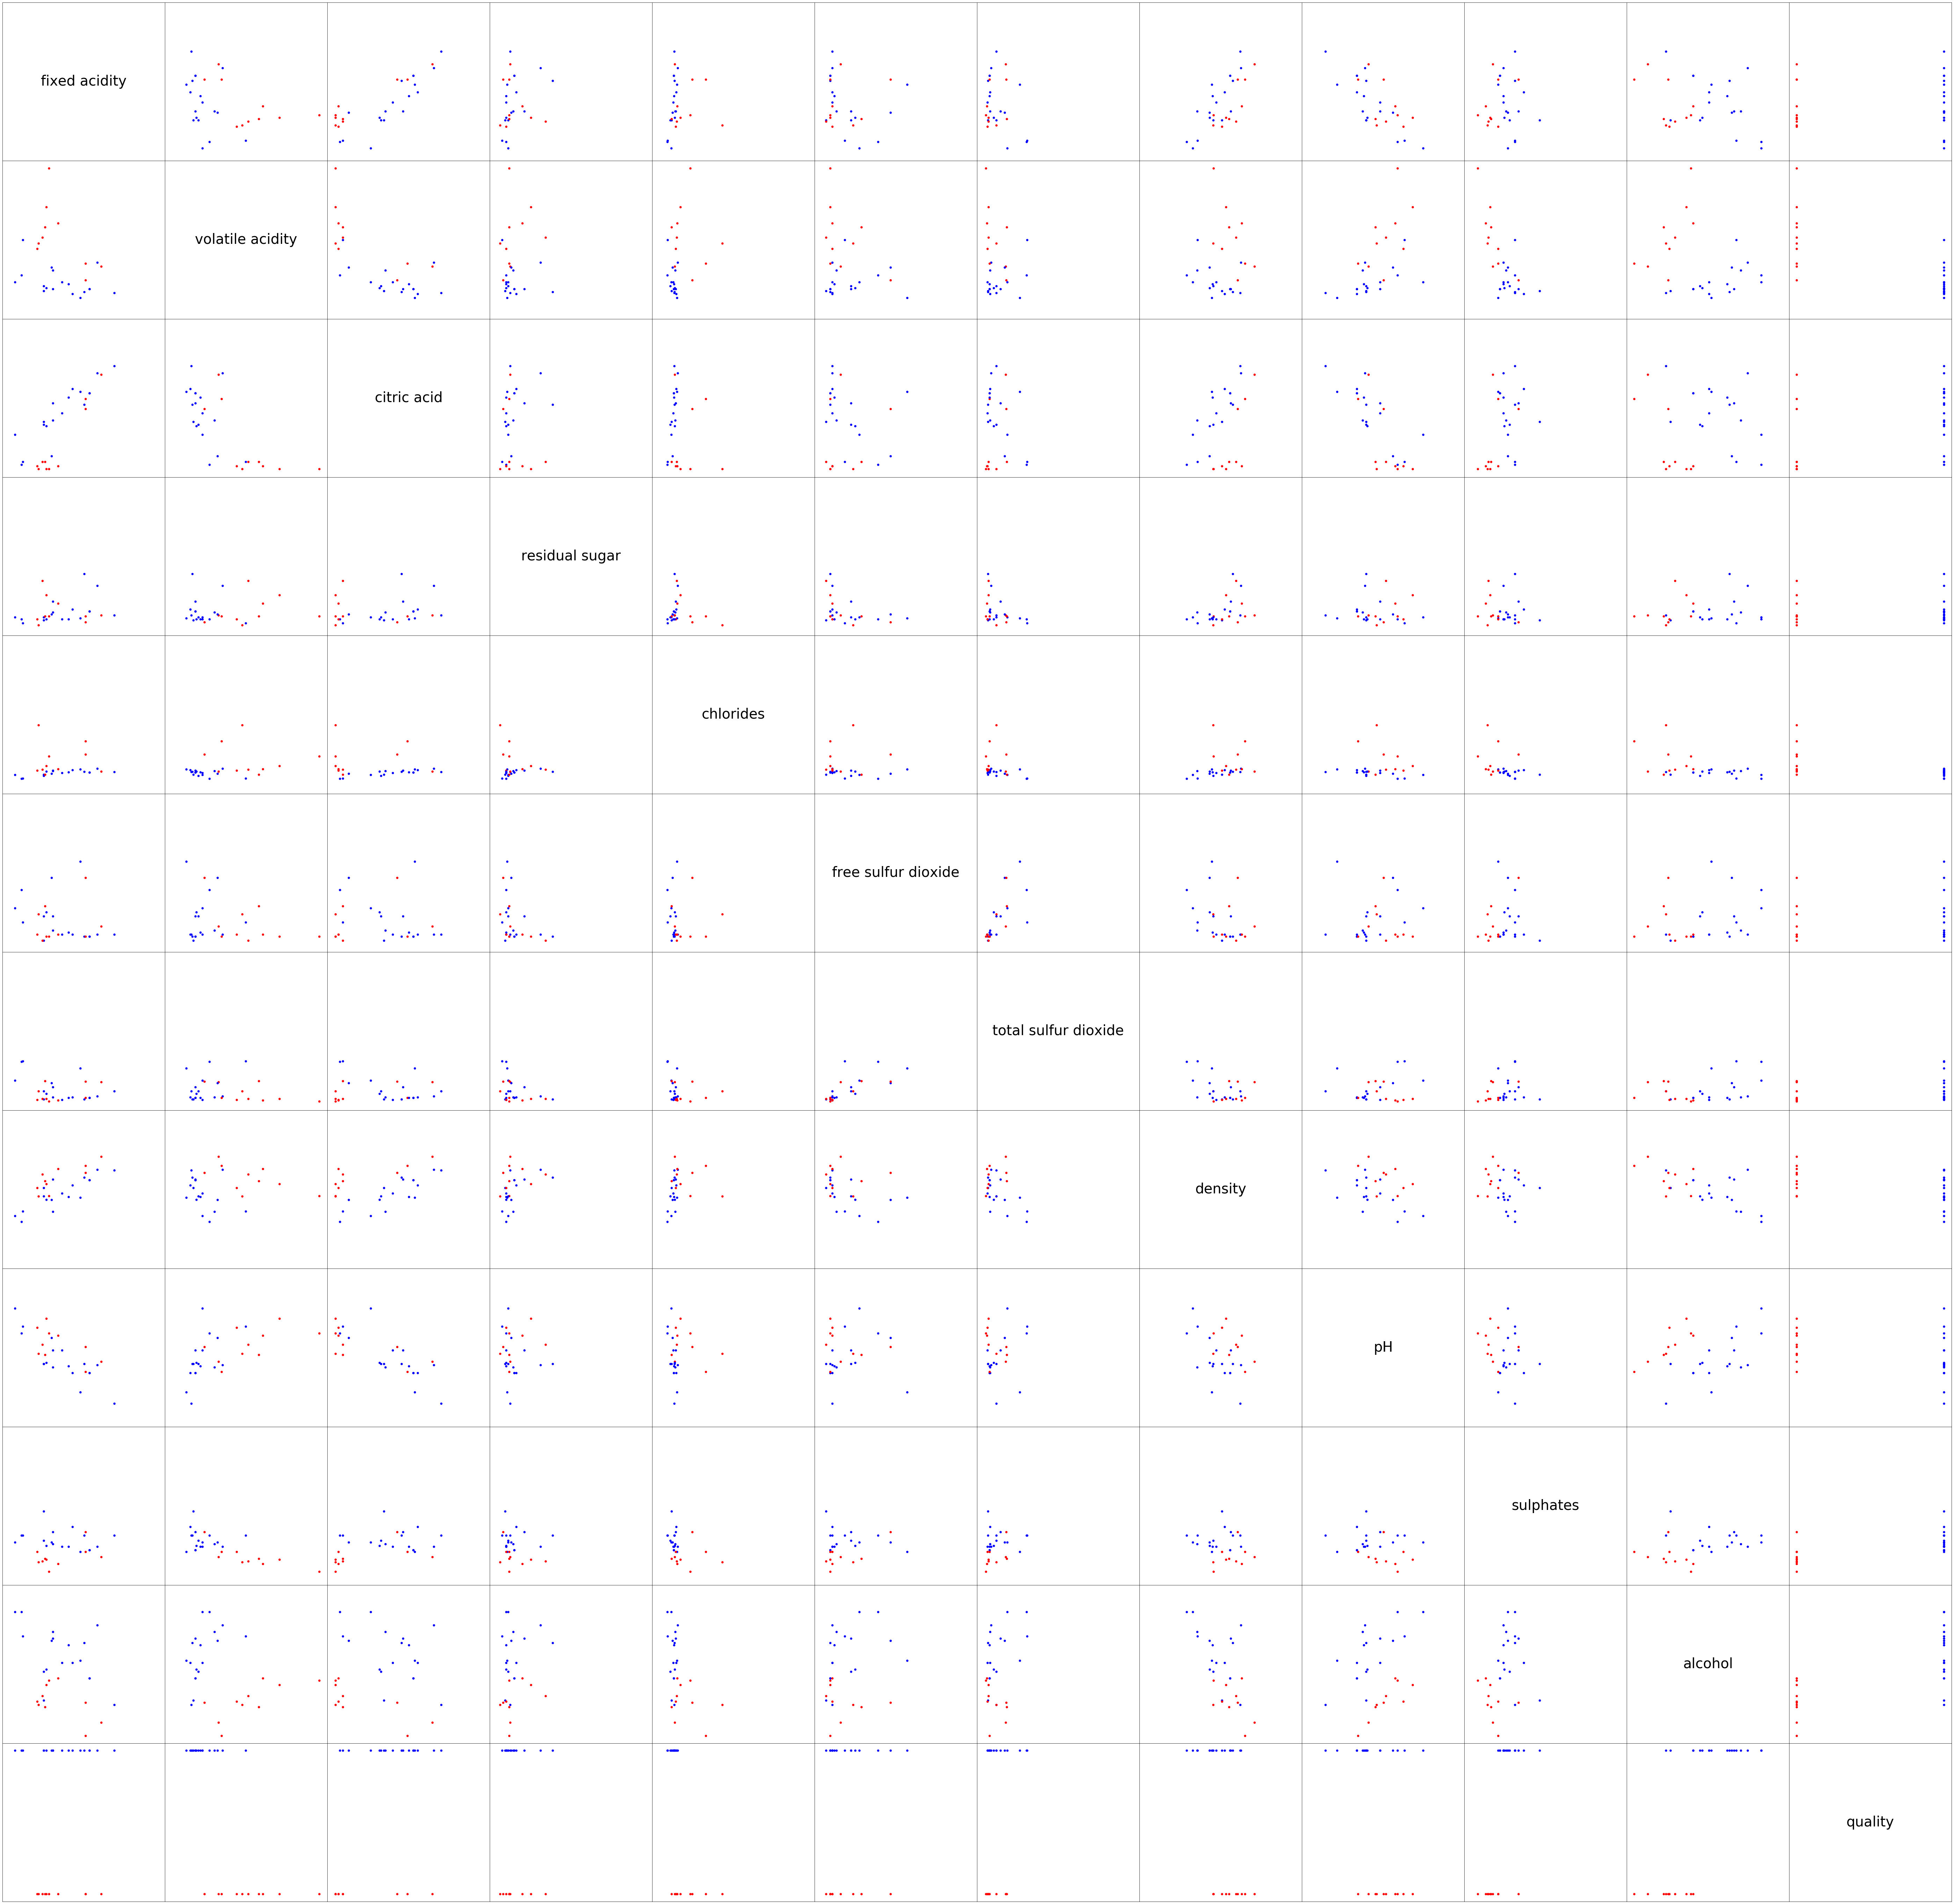

In [4]:
plot_scatter_matrix(red_wines, 7, 4)

Alcohol and pH will be good factors to begin with as we can clearly see a linear separation between both.

# V.2: Learning to perceptron

__a) & b) Perceptron implementation__

In [5]:
import random

red_wines['is good'] = red_wines['quality'] > 5

selected_red_wines = red_wines[(red_wines['quality'] > 7) | (red_wines['quality'] < 4)]
selected_red_wines = selected_red_wines.reset_index(drop=True)

X = selected_red_wines.loc[:, ['pH', 'alcohol']].values
Y = selected_red_wines['is good'].values


selected_red_wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is good
0,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8,True
1,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8,True
2,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8,True
3,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8,True
4,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8,True
5,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3,False
6,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.9964,3.15,0.92,11.7,8,True
7,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8,True
8,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.9972,3.15,0.65,11.0,8,True
9,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.9994,3.16,0.63,8.4,3,False


In [6]:
def dot_product(a, b):
    
    if len(a) != len(b):
        raise ValueError('arguments have different length')
        
    result = 0
    
    for i in range(len(a)):
        result += a[i] * b[i]
        
    return result

In [7]:
class Perceptron:
    
    def __init__(self, learning_rate=0.1):
        self.lr = learning_rate
    
    def train(self, X, Y, number_of_epochs=0):
        
        random.seed(1000)
        self.W = [0.0001 * random.uniform(-1, 1) for i in range(X.shape[1] + 1)]
        
        self.performance = []
        
        current_epoch = 0
        while True:
            if number_of_epochs != 0 and current_epoch >= number_of_epochs:
                break
            misclassified = 0
            for xi, yi in zip(X, Y):
                delta_rule = self.lr * (yi - self.predict(xi))
                self.W[1:] += delta_rule * xi
                self.W[0] += delta_rule
                misclassified += int(delta_rule != 0)
            self.performance.append(
                [current_epoch,
                 misclassified,
                 self.W[1:],
                 self.W[0]])
            if misclassified == 0:
                break
            current_epoch += 1
        
        return self.performance
    
    def predict(self, X):
        return 1 if dot_product(self.W[1:], X) + self.W[0] >= 0 else 0

In [8]:
perceptron = Perceptron()

training_performance = perceptron.train(X, Y)
#print(training_performance)

__c) Plotting the performance during training__

In [9]:
def plot_performance(performance,
                     wine_data,
                     good_threshold,
                     bad_threshold,
                     epoch=-1,
                     save_plot=False):
    
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    
    axes[0].plot([x[0] for x in performance], [x[1] for x in performance])
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('classification errors')
    axes[0].set_title('Errors as a function of epoch')
    
    selected_red_wines = wine_data[(wine_data['quality'] > good_threshold)
                                   | (wine_data['quality'] < bad_threshold)]
    x = selected_red_wines.loc[:, ['alcohol']].values
    y = selected_red_wines.loc[:, ['pH']].values
    
    x_min = x.min() - 0.15
    x_max = x.max() + 0.15
    y_min = y.min() - 0.15
    y_max = y.max() + 0.15
    
    w2, w1 = performance[epoch][2]
    b = performance[epoch][3]
    slope = -(w1/w2)#/(b/w1)
    intercept = -b/w2
    x_coords = range(int(x_min) - 1, int(x_max) + 2)
    y_coords = slope * x_coords + intercept
    
    axes[1].plot(x_coords, y_coords,'b--', label='Decision boundary')
    axes[1].set_xlim([x_min, x_max])
    axes[1].set_ylim([y_min, y_max])
    axes[1].fill_between(x_coords, y_coords, y_min, color='b', alpha=0.2)
    axes[1].fill_between(x_coords, y_coords, y_max, color='r', alpha=0.2)
    
    good_wines = wine_data[(wine_data['quality'] > good_threshold)]
    bad_wines = wine_data[(wine_data['quality'] < bad_threshold)]
    
    axes[1].scatter(bad_wines['alcohol'],
                    bad_wines['pH'],
                    c=['r'],
                    label='bad wines (< {} score)'.format(bad_threshold))
    
    axes[1].scatter(good_wines['alcohol'],
                    good_wines['pH'],
                    c=['b'],
                    label='good wines (> {} score)'.format(good_threshold))
    
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc=2)
    
    axes[1].set_title('Decision boundary on epoch: {}'.format(performance[epoch][0]))
    axes[1].set_xlabel('alcohol')
    axes[1].set_ylabel('pH')
        
    plt.show()
    
    if save_plot == True:
        plt.savefig('scatter_matrix.png')   
    

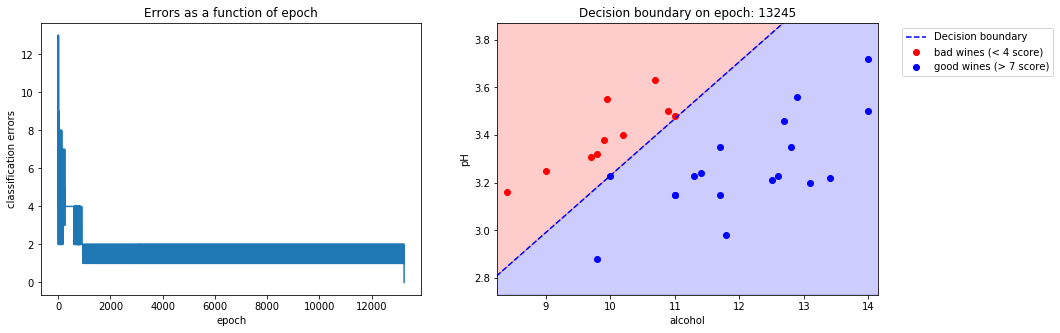

In [10]:
plot_performance(training_performance, red_wines, 7, 4)

__d) Feature scaling to speed up training__

In [11]:
def scale_series(series):
    return (series - series.mean()) / (series.max() - series.min())        

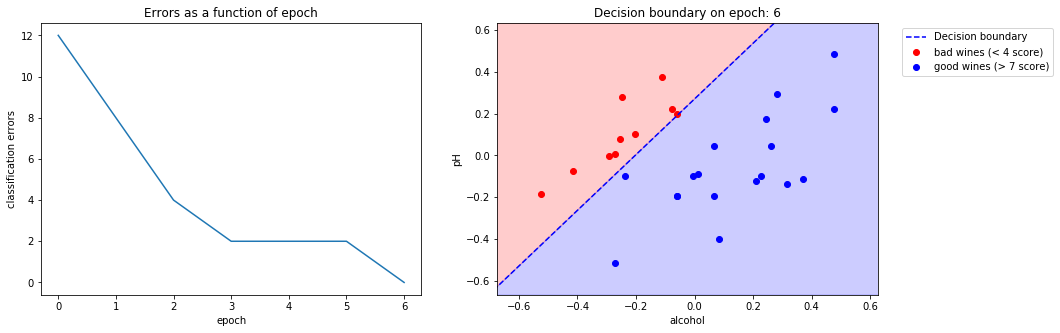

In [12]:
selected_red_wines = red_wines[(red_wines['quality'] > 7) | (red_wines['quality'] < 4)]
selected_red_wines = selected_red_wines.reset_index(drop=True)

selected_red_wines['pH'] = scale_series(selected_red_wines['pH'])
selected_red_wines['alcohol'] = scale_series(selected_red_wines['alcohol'])

X = selected_red_wines.loc[:, ['pH', 'alcohol']].values
Y = selected_red_wines['is good'].values

perceptron = Perceptron(learning_rate=0.0001)

training_performance = perceptron.train(X, Y)

plot_performance(training_performance, selected_red_wines, 7, 4)

# V.3: My fair ADALINE

__a) Marvin notices and chides you for torturing your perceptron. Why?__

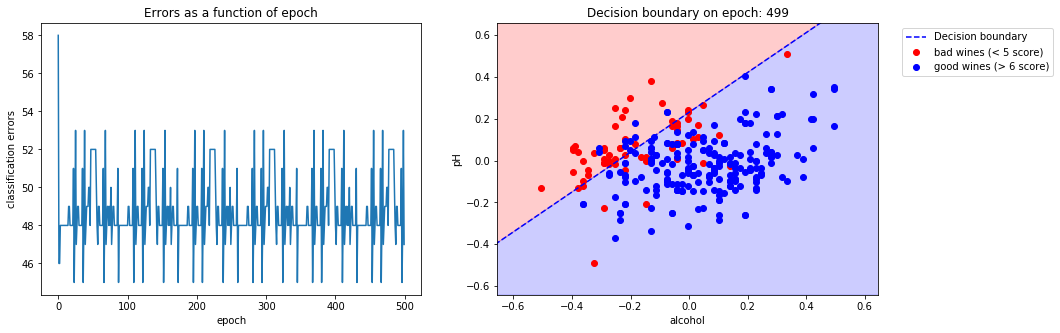

In [13]:
selected_red_wines = red_wines[(red_wines['quality'] > 6) | (red_wines['quality'] < 5)]
selected_red_wines = selected_red_wines.reset_index(drop=True)

selected_red_wines['pH'] = scale_series(selected_red_wines['pH'])
selected_red_wines['alcohol'] = scale_series(selected_red_wines['alcohol'])

X = selected_red_wines.loc[:, ['pH', 'alcohol']].values
Y = selected_red_wines['is good'].values

perceptron = Perceptron(learning_rate=0.0001)

training_performance = perceptron.train(X, Y, number_of_epochs=500)

plot_performance(training_performance, selected_red_wines, 6, 5)

The perceptron cannot converge on non-linearly differentiable data. It will always make some errors and thus never stop training.

__b) & c) Implementing ADALINE__

In [14]:
import math

class Adaline:
    
    def __init__(self, learning_rate=0.1):
        self.lr = learning_rate
        
    def activation(self, X):
        var = dot_product(self.W[1:], X) + self.W[0]
        return 1 / (1 + math.exp(-var))
    
    def predict(self, X):
        return 1 if self.activation(X) >= 0 else 0
        
    def train(self, X, Y, number_of_epochs=0, mode="batch"):
        
        random.seed(1000)
        self.W = [0.0001 * random.uniform(-1, 1) for i in range(X.shape[1] + 1)]
        
        self.performance = []
        
        current_epoch = 0
        while True:
            if number_of_epochs and current_epoch >= number_of_epochs:
                break
                
            misclassified = 0
            epoch_losses = []
            
            for xi, yi in zip(X, Y):
                oi = self.activation(xi)
                loss = yi - oi
                epoch_losses.append(loss)
                                
                if mode == "online":
                    self.W[1:] += self.lr * loss * xi
                    self.W[0] += self.lr * loss
                    
                misclassified += 1 if yi - round(oi) else 0
                
            if mode == "batch":
                self.W[1:] += self.lr * dot_product(X, epoch_losses)
                self.W[0] += self.lr * sum(epoch_losses)
                
            self.performance.append(
                [current_epoch,
                 misclassified,
                 self.W[1:],
                 self.W[0]])
            
            if number_of_epochs == 0 and misclassified == 0:
                break
                
            current_epoch += 1
        
        return self.performance

__d) Find a good learning rate__

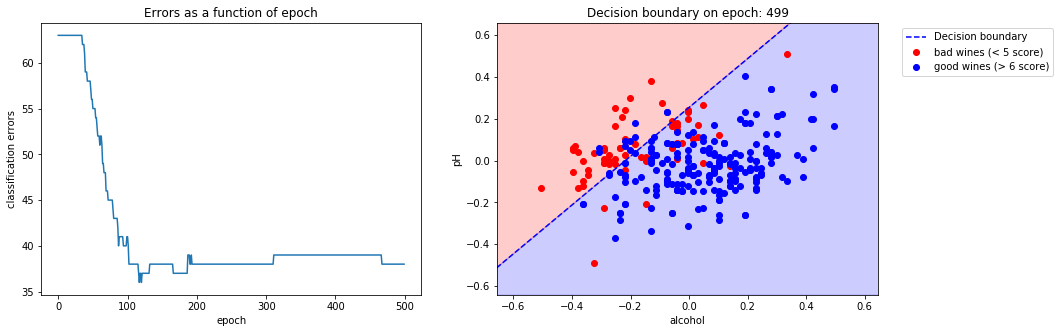

In [15]:
selected_red_wines = red_wines[(red_wines['quality'] > 6) | (red_wines['quality'] < 5)]
selected_red_wines = selected_red_wines.reset_index(drop=True)

selected_red_wines['pH'] = scale_series(selected_red_wines['pH'])
selected_red_wines['alcohol'] = scale_series(selected_red_wines['alcohol'])

X = selected_red_wines.loc[:, ['pH', 'alcohol']].values
Y = selected_red_wines['is good'].values

adaline = Adaline(learning_rate=0.01)

training_performance = adaline.train(X, Y, number_of_epochs=500)
#print(training_performance)

plot_performance(training_performance, selected_red_wines, 6, 5)

# V.4: Advanced wine sampling and resampling

__a) Write a function that uses the holdout method to partition the data into a training and a validation set__

In [16]:
def holdout_validation(data, validation_size=0.2):
    training_df = data.sample(frac=validation_size)
    validation_df = data.drop(training_df.index)
    return (training_df, validation_df)

__b) Write a function that generates a k-fold cross-validation dataset from the data__

In [17]:
def cross_validation(data, k=3, shuffle=False):
    if shuffle:
        data = data.sample(frac=1).reset_index(drop=True)
    folds = []
    for x in range(k, 0, -1):
        fold_size = len(data) // x
        if len(data) % x:
            new_fold = data.sample(n=fold_size+1)
        else:
            new_fold = data.sample(n=fold_size)
        folds.append(new_fold)
        data = data.drop(new_fold.index)
    dataset = []
    for x in range(len(folds)):
        dataset.append((folds[x], pd.concat(folds).drop(folds[x].index)))
    return dataset